In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("./../../Dataset/data-week-2/lang_iden_combined.csv")

In [7]:
df.head()

,Unnamed: 0,lang,text
0,0,en,But many have tried to supply missing details.
1,1,en,Jaish-e-Mohammed (JeM) control rooms were also...
2,2,en,He declined to speak further on the issue.
3,3,en,"In Haryana, there are over 1.83 crore voters, ..."
4,4,en,"Therefore, this has to be done cautiously."


In [8]:
df.drop(columns = ["Unnamed: 0"], axis = 1, inplace = True)

In [10]:
# Label Encoder for lang
df["lang"].value_counts()

lang
en    200
gu    200
hi    200
ml    200
pa    200
Name: count, dtype: int64

In [88]:
df[df["lang"] == "pa"]

,lang,text,language_id
800,pa,ਪਰਹੇਜ਼ ਕਰਨ ਦਾ ਇਹ ਮਤਲਬ ਨਹੀਂ ਹੈ ਕਿ ਯਹੋਵਾਹ ਦੇ ਗਵਾ...,4
801,pa,ਪੁਲਿਸ ਨੇ ਦੋ ਸ਼ੱਕੀਆਂ ਨੂੰ ਗਿ੍ਫ਼ਤਾਰ ਵੀ ਕਰ ਲਿਆ ਹੈ।,4
802,pa,ਚੀਫ਼ ਜਸਟਿਸ ਰੰਜਨ ਗੋਗੋਈ ਤੇ ਜਸਟਿਸ ਅਨਿਰੁੱਧ ਬੋਸ ਦੇ ...,4
803,pa,ਦਿੱਲੀ ਪੁਲੀਸ ਹਰੇਕ ਲਈ ਹੈ।,4
804,pa,( ੳ) ਕਿਨ੍ਹਾਂ ਨੂੰ ਸ਼ਾਇਦ ਸਾਡੇ ਘਰ ਕਾਫ਼ੀ ਸਮਾਂ ਰਹਿਣ...,4
...,...,...,...
995,pa,ਅਤੇ ਅਸੀਂ ਤੁਹਾਡਾ ਸਵਾਗਤ ਕਰਦੇ ਹਾਂ!,4
996,pa,"ਆਪਣੇ ਬਚਨ, ਬਾਈਬਲ ਵਿਚ, ਯਹੋਵਾਹ ਨੇ ਸਦੀਆਂ ਦੌਰਾਨ ਅਪੂ...",4
997,pa,ਇਸ ਟੀਕੇ ਦੀਆਂ ਦੋ ਖੁਰਾਕਾਂ ਦਿੱਤੀਆਂ ਜਾਣਗੀਆਂ।,4
998,pa,ਯਿਸੂ ਨੇ ਕਿਹਾ: “ਮੈਂ ਹੀ ਹਾਂ ਜਿਸ ਰਾਹੀਂ ਮਰੇ ਹੋਇਆਂ ...,4


In [19]:
# Encoding the langauge label for training 
from sklearn.preprocessing import LabelEncoder   # Class for labeling the data

encoder = LabelEncoder()
df["language_id"] = encoder.fit_transform(df["lang"])


In [24]:
encoder.classes_,  df["language_id"].unique()

(array(['en', 'gu', 'hi', 'ml', 'pa'], dtype=object), array([0, 1, 2, 3, 4]))

### Train Test Split

In [67]:
X = df["text"]
Y = df["language_id"]


In [68]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 42)

- scikit-learn offers a built-in CountVectorizer or TfidfVectorizer that handles both tokenization and vectorization.

- Bag of Words (BoW): Representing text as a vector of word counts.

In [69]:
# Importing CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
x_train = vectorizer.fit_transform(x_train)

In [70]:
vocab_size = len(vectorizer.get_feature_names_out())
print(f"Vocabulary size: {vocab_size}")

Vocabulary size: 2706


In [71]:
vocabulary = vectorizer.get_feature_names_out()
for idx, token in enumerate(vocabulary):
    print(f"Token : {token} and ID : {idx}")

Token : 000 and ID : 0
Token : 020 and ID : 1
Token : 027 and ID : 2
Token : 06 and ID : 3
Token : 10 and ID : 4
Token : 100 and ID : 5
Token : 100મ and ID : 6
Token : 11 and ID : 7
Token : 11ਵ and ID : 8
Token : 12 and ID : 9
Token : 13 and ID : 10
Token : 14 and ID : 11
Token : 140 and ID : 12
Token : 147 and ID : 13
Token : 15 and ID : 14
Token : 16ആ and ID : 15
Token : 176 and ID : 16
Token : 17th and ID : 17
Token : 17व and ID : 18
Token : 18 and ID : 19
Token : 19 and ID : 20
Token : 1936 and ID : 21
Token : 1972 and ID : 22
Token : 1986 and ID : 23
Token : 20 and ID : 24
Token : 200 and ID : 25
Token : 2007ല and ID : 26
Token : 2009 and ID : 27
Token : 2010 and ID : 28
Token : 2011 and ID : 29
Token : 2013ല and ID : 30
Token : 2014 and ID : 31
Token : 2015 and ID : 32
Token : 2017 and ID : 33
Token : 2018 and ID : 34
Token : 2019 and ID : 35
Token : 2021 and ID : 36
Token : 2022 and ID : 37
Token : 21 and ID : 38
Token : 22 and ID : 39
Token : 221 and ID : 40
Token : 275 and ID 

In [72]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

naive_bayes_Multinomial = MultinomialNB()
naive_bayes_Multinomial.fit(x_train, y_train)

MultinomialNB()

In [73]:
# vectorize it
x_test = vectorizer.transform(x_test)

In [74]:
y_test_pred = naive_bayes_Multinomial.predict(x_test)

In [75]:
naive_bayes_Multinomial.score(x_test, y_test)

0.95

In [127]:
import seaborn as sns
from  sklearn.metrics import confusion_matrix

def eval_confusion_matrix(model, x, y):
    y_pred = model.predict(x)
    print(confusion_matrix(y, y_pred))
    sns.heatmap(confusion_matrix(y, y_pred), annot = True, fmt = ".2f", cmap = "Blues", xticklabels = encoder.inverse_transform(y_test.unique()), yticklabels = encoder.inverse_transform(y_test.unique()), cbar = True)
    
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()    

[[37  1  1  1  0]
 [ 3 37  0  0  0]
 [ 0  0 40  0  0]
 [ 2  0  0 38  0]
 [ 2  0  0  0 38]]


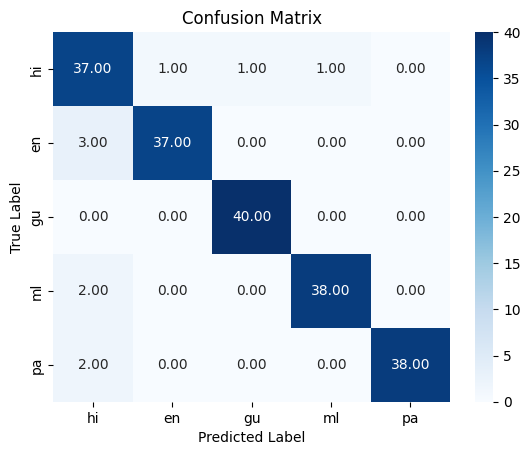

In [128]:
eval_confusion_matrix(naive_bayes_Multinomial, x_test, y_test)

In [76]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model, x, y):
    # Evaluate the model

    # Accuracy score
    y_pred = model.predict(x)
    accuracy = accuracy_score(y, y_pred)
    print(f"Accuracy: {accuracy * 100:.2f}%")

    # Precision
    precision = precision_score(y, y_pred, average='weighted')
    print(f"Precision: {precision * 100:.2f}%")

    # Recall
    recall = recall_score(y, y_pred, average='weighted')
    print(f"Recall: {recall * 100:.2f}%")

    # F1-Score
    f1 = f1_score(y, y_pred, average='weighted')
    print(f"F1-Score: {f1 * 100:.2f}%")

In [77]:
evaluate_model(naive_bayes_Multinomial, x_test, y_test)

Accuracy: 95.00%
Precision: 95.29%
Recall: 95.00%
F1-Score: 95.07%


In [93]:
print("Train Model Analysis")
evaluate_model(naive_bayes_Multinomial, x_train, y_train)

Train Model Analysis
Accuracy: 99.00%
Precision: 99.05%
Recall: 99.00%
F1-Score: 99.01%


In [92]:
new_text = ["ക്ഷമിക്കണം."]

new_text = vectorizer.transform(new_text)

predicted_class = naive_bayes_Multinomial.predict(new_text)
print(f"Predicted class for the new text: {predicted_class[0]}")
decoded_label = encoder.inverse_transform([predicted_class[0]])
decoded_label

Predicted class for the new text: 3


array(['ml'], dtype=object)

array(['gu'], dtype=object)